In [1]:
import pandas as pd
df=pd.read_csv('housing.csv')
df
     

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df.isnull().sum()  # Checking the null values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:

df.dropna(subset=['total_bedrooms'], inplace=True)  # Dropping Null values

In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
# Separating categorical and numerical Values
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('Categorical:', cat)
print('Numerical:', num)

Categorical: ['ocean_proximity']
Numerical: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [7]:
# Treating Categorical Values
for i in df:
  print(i)
  print('Unique Values:', df[i].unique())     # Finding unique values
  print('Number of unique:', df[i].nunique())
  print()
  print()

longitude
Unique Values: [-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9  -120.91 -120.57 -120.

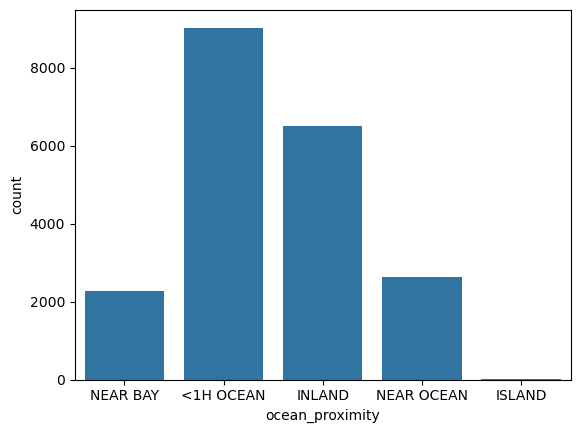

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
def cat_analysis(col):
  df[col].value_counts()
  sns.countplot(x=col,data=df)
  plt.show()

for i in cat:
  cat_analysis(i)

In [9]:
def outlier_detection_treatment(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - 1.5 * iqr
    uf = q3 + 1.5 * iqr

    # Identify outliers
    outliers = df[(df[col] < lf) | (df[col] > uf)]
    print("Percentage of outliers in", col, ":", round(outliers.shape[0] * 100 / df.shape[0], 2), "%")

    # Visualization
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].boxplot(df[col])
    ax[1].hist(df[col])
    plt.suptitle(col)
    plt.show()

    # Treat outliers with median
    df.loc[(df[col] < lf) | (df[col] > uf), col] = df[col].median()



Percentage of outliers in longitude : 0.0 %


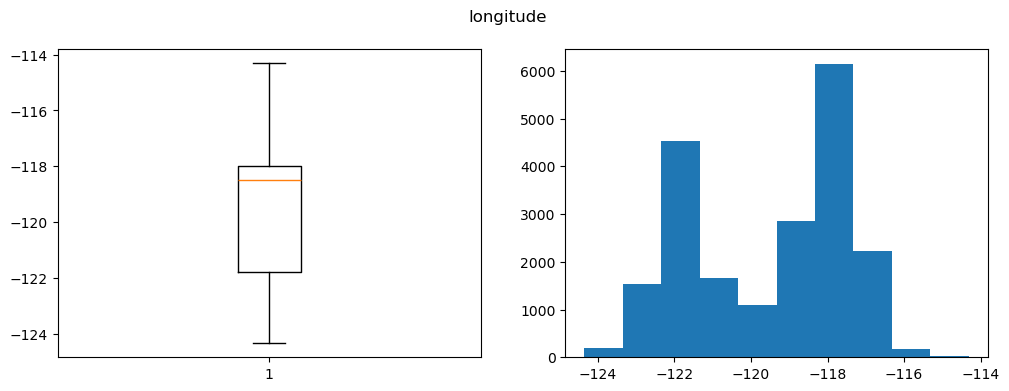

+++====+++
Percentage of outliers in latitude : 0.0 %


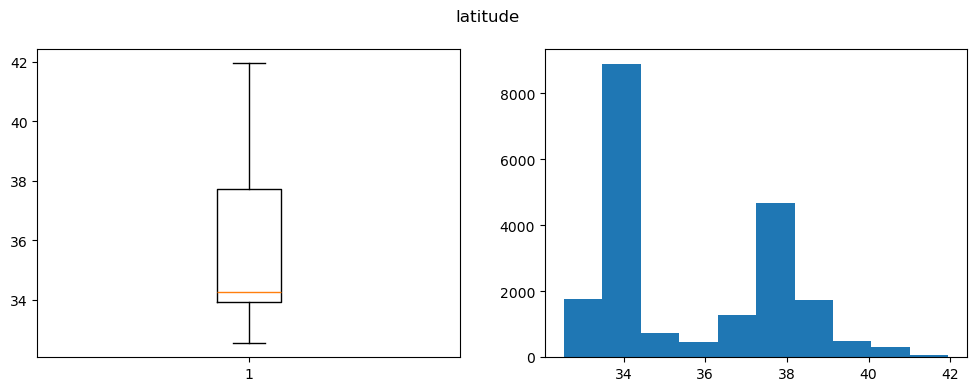

+++====+++
Percentage of outliers in housing_median_age : 0.0 %


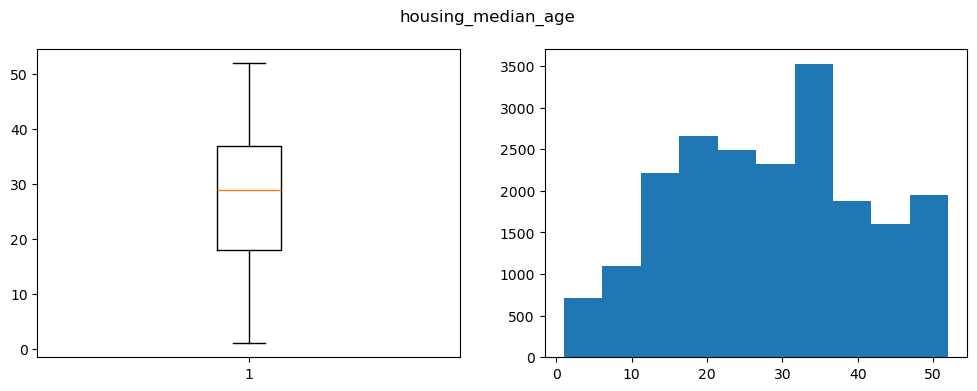

+++====+++
Percentage of outliers in total_rooms : 6.31 %


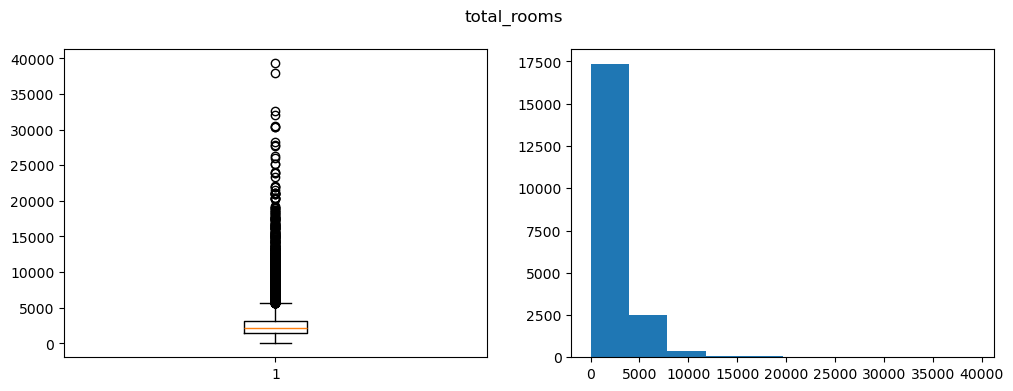

+++====+++
Percentage of outliers in total_bedrooms : 6.22 %


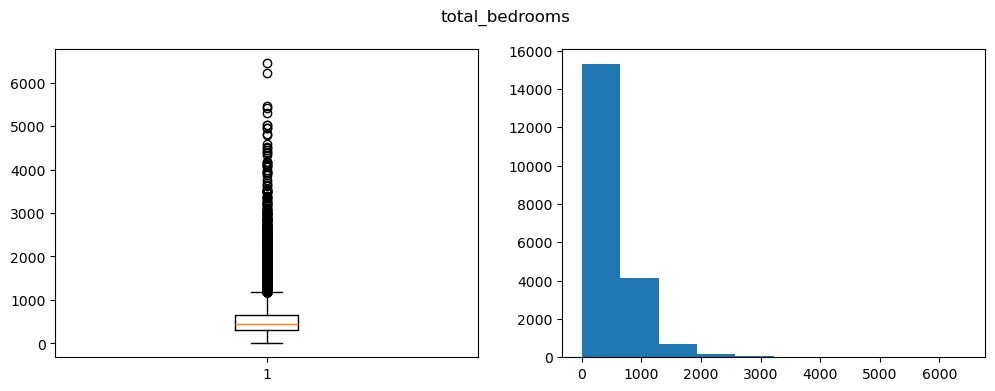

+++====+++
Percentage of outliers in population : 5.82 %


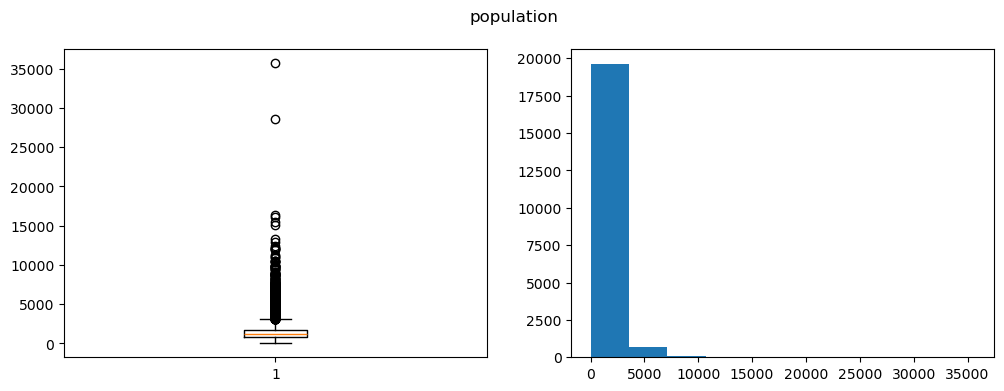

+++====+++
Percentage of outliers in households : 5.92 %


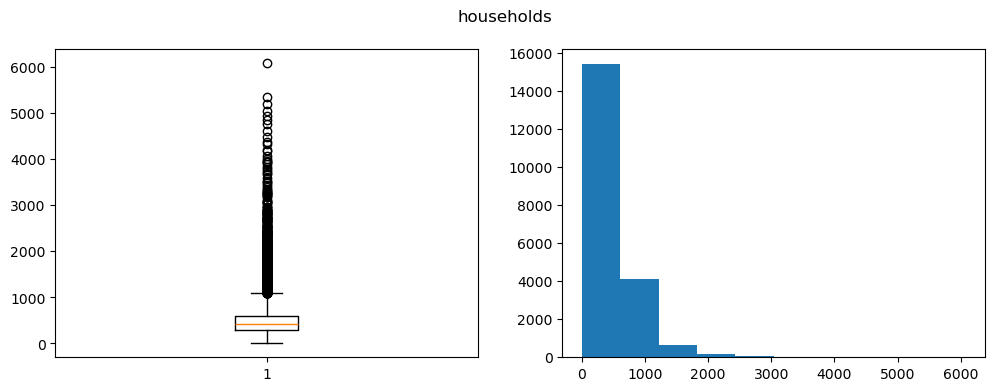

+++====+++
Percentage of outliers in median_income : 3.28 %


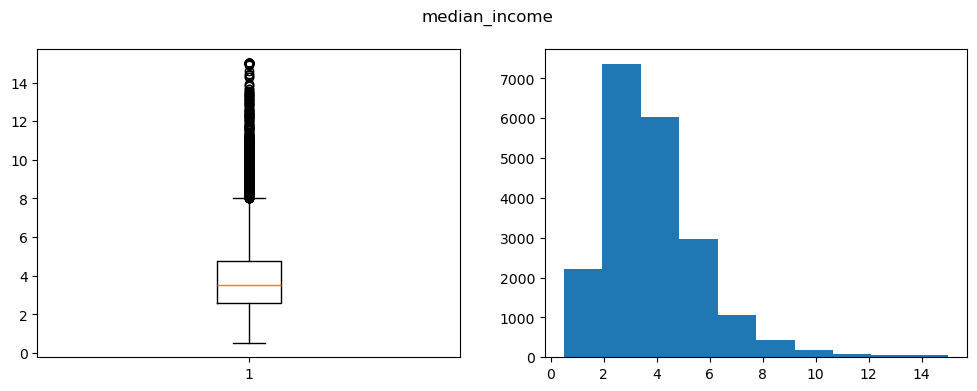

+++====+++
Percentage of outliers in median_house_value : 5.21 %


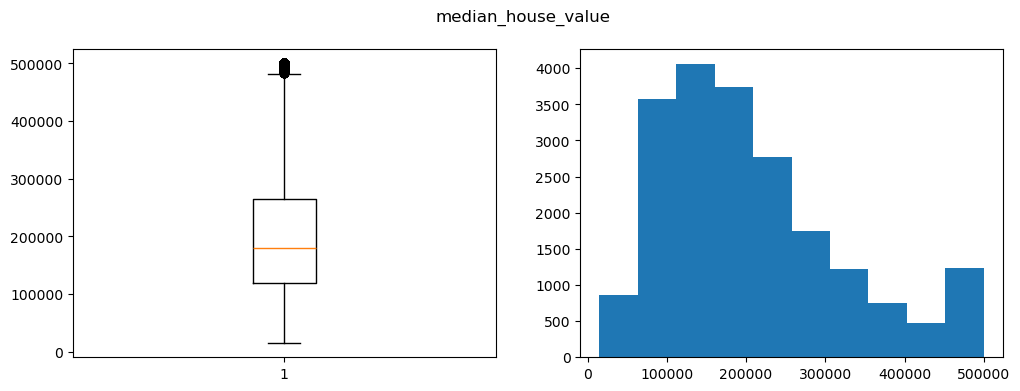

+++====+++


In [10]:
for col in num:
    outlier_detection_treatment(col)
    print("+++====+++")

In [11]:
df = df.reset_index(drop=True)

Encoding the Categorical Data

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe_ocean = OneHotEncoder(sparse_output=False)
ocean_arr = ohe_ocean.fit_transform(df[['ocean_proximity']])
ocean = pd.DataFrame(ocean_arr, columns=ohe_ocean.get_feature_names_out(['ocean_proximity']))

In [14]:
print(ocean.columns)

Index(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [15]:
ocean = ocean.drop('ocean_proximity_ISLAND', axis=1)

In [16]:
ocean

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
20428,0.0,1.0,0.0,0.0
20429,0.0,1.0,0.0,0.0
20430,0.0,1.0,0.0,0.0
20431,0.0,1.0,0.0,0.0


Splitting the Independent and Dependent Variables

In [17]:
x=df.drop(['ocean_proximity', 'median_house_value'],axis=1)
y=df['median_house_value']
     

In [18]:
x.shape

(20433, 8)

In [19]:

x=pd.concat([x,ocean],axis=1)

In [20]:
x.shape


(20433, 12)

In [21]:
x=x.values
y=y.values

In [22]:
y.shape

(20433,)

Segmenting Training and Testing Data

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
y_test.shape

(6130,)

In [24]:
x_train.shape

(14303, 12)

Applying Linear Regression Model

In [25]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train_lr = model.predict(x_train)
y_pred_test_lr = model.predict(x_test)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model saved as 'model.pkl'")

print('Training Data Evaluation')
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_lr))
print("R^2 Score:", r2_score(y_train, y_pred_train_lr))

print('\nTesting Data Evaluation')
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test_lr))
print("R^2 Score:", r2_score(y_test, y_pred_test_lr))


Model saved as 'model.pkl'
Training Data Evaluation
Mean Squared Error: 4299349797.790157
R^2 Score: 0.5066397138653298

Testing Data Evaluation
Mean Squared Error: 4205775792.7677445
R^2 Score: 0.502008645133664


Applying Polynomial Regression Model

In [26]:
from sklearn.preprocessing import PolynomialFeatures
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)
model = LinearRegression()
model.fit(X_poly_train, y_train)

y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)

# Evaluate the model
print("Training Data Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("R^2 Score:", r2_score(y_train, y_train_pred))

print("\nTesting Data Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("R^2 Score:", r2_score(y_test, y_test_pred))

Training Data Evaluation:
Mean Squared Error: 3364132125.4300823
R^2 Score: 0.6139580945820893

Testing Data Evaluation:
Mean Squared Error: 3437973553.7346215
R^2 Score: 0.592921450790831


Applying Support Vector Regressor Mode

In [31]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

svr_pipeline = make_pipeline(StandardScaler(), SVR())
param_grid = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.01, 0.1, 0.5, 1.0],
    'svr__gamma': ['scale', 'auto']
}

random_search = RandomizedSearchCV(svr_pipeline, param_grid, n_iter=10, cv=3, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
random_search.fit(x_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_jobs=-1,
                   param_distributions={'svr__C': [0.01, 0.1, 0.5, 1.0],
                                        'svr__gamma': ['scale', 'auto'],
                                        'svr__kernel': ['linear', 'rbf']},
                   scoring='neg_mean_squared_error', verbose=2)

In [32]:
# Predictions and evaluation
y_pred_train_svr = random_search.best_estimator_.predict(x_train)
y_pred_test_svr = random_search.best_estimator_.predict(x_test)

print("Training Data Evaluation:")
print('SVR RMSE:',mean_squared_error(y_train,y_pred_train_svr)**0.5)
print('SVR R2 Score:',r2_score(y_train,y_pred_train_svr))

Training Data Evaluation:
SVR RMSE: 87403.65173281883
SVR R2 Score: 0.12336145549326549


In [34]:
y_pred_test_svr=random_search.predict(x_test)

print("\nTesting Data Evaluation:")
print('SVR RMSE:',mean_squared_error(y_test,y_pred_test_svr))
print('SVR R2 Score:',r2_score(y_test,y_pred_test_svr))


Testing Data Evaluation:
SVR RMSE: 7415057140.071483
SVR R2 Score: 0.1220087485535124


Applying Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':[10, 15, 20, 25, 30],
    'min_samples_split':[5,10,15],
    'min_samples_leaf':[2,4,6],
    'criterion':[ 'squared_error'],
    'max_features': ['sqrt']
}

gridtree=GridSearchCV(DecisionTreeRegressor(random_state=0),param_grid,cv=7,scoring='neg_mean_squared_error',verbose=2, n_jobs=-1)

gridtree.fit(x_train,y_train)

best_model = gridtree.best_estimator_

y_pred_traindt=best_model.predict(x_train)
y_pred_testdt=best_model.predict(x_test)

print("Training Data Evaluation:")
print('Decision Tree RMSE:',mean_squared_error(y_train,y_pred_traindt)**0.5)
print('Decision Tree R2 Score:',r2_score(y_train,y_pred_traindt))

print("\nTesting Data Evaluation:")
print('Decision Tree RMSE:',mean_squared_error(y_test,y_pred_testdt))
print('Decision Tree R2 Score:',r2_score(y_test,y_pred_testdt))

Fitting 7 folds for each of 45 candidates, totalling 315 fits
Training Data Evaluation:
Decision Tree RMSE: 58879.85252831132
Decision Tree R2 Score: 0.6021724699313569

Testing Data Evaluation:
Decision Tree RMSE: 4280506321.8490415
Decision Tree R2 Score: 0.4931600618375529


Applying Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['squared_error'],
    'max_features': ['sqrt']
}
gridrf=GridSearchCV(RandomForestRegressor(random_state=0),param_grid_rf,cv=5,scoring='neg_mean_squared_error',verbose=2, n_jobs=-1)

gridrf.fit(x_train,y_train)

y_pred_trainrf=gridrf.predict(x_train)
y_pred_testrf=gridrf.predict(x_test)

print("Training Data Evaluation:")
print('Random Forest RMSE:',mean_squared_error(y_train,y_pred_trainrf)**0.5)
print('Random Forest R2 Score:',r2_score(y_train,y_pred_trainrf))

print("\nTesting Data Evaluation:")
print('Random Forest RMSE:',mean_squared_error(y_test,y_pred_testrf))
print('Random Forest R2 Score:',r2_score(y_test,y_pred_testrf))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Training Data Evaluation:
Random Forest RMSE: 21876.623213716084
Random Forest R2 Score: 0.9450810810118394

Testing Data Evaluation:
Random Forest RMSE: 2727829530.265222
Random Forest R2 Score: 0.6770071467059311


In [37]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy scores for training and test data
train_score1 = metrics.r2_score(y_train, y_pred_train_lr)*100
train_score2 = metrics.r2_score(y_train, y_train_pred)*100
train_score3 = metrics.r2_score(y_train, y_pred_train_svr)*100
train_score4 = metrics.r2_score(y_train, y_pred_traindt)*100
train_score5 = metrics.r2_score(y_train, y_pred_trainrf)*100

test_score1 = metrics.r2_score(y_test, y_pred_test_lr)*100
test_score2 = metrics.r2_score(y_test, y_test_pred)*100
test_score3 = metrics.r2_score(y_test, y_pred_test_svr)*100
test_score4 = metrics.r2_score(y_test, y_pred_testdt)*100
test_score5 = metrics.r2_score(y_test, y_pred_testrf)*100

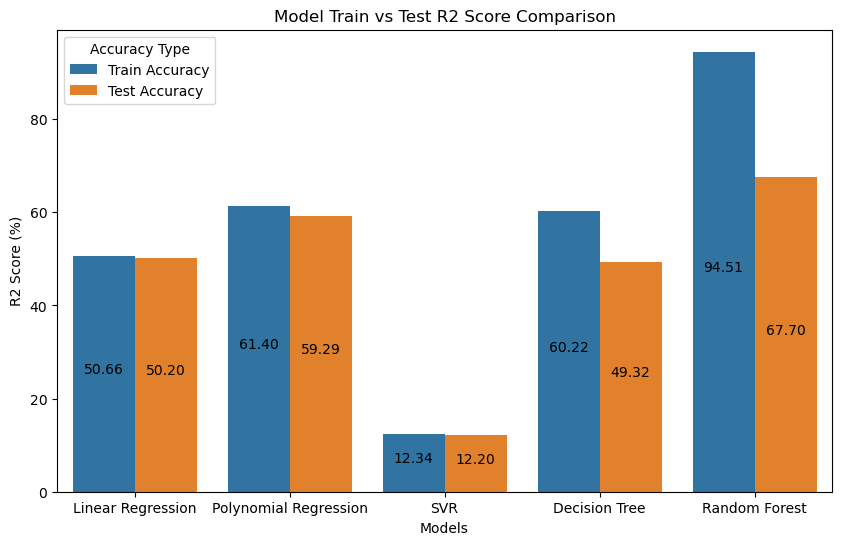

In [42]:
# Create a DataFrame for plotting
final_data = pd.DataFrame({
    'MODELS': ['Linear Regression', 'Polynomial Regression', 'SVR', 'Decision Tree', 'Random Forest'],
    "Train Accuracy": [train_score1, train_score2, train_score3, train_score4, train_score5],
    "Test Accuracy": [test_score1, test_score2, test_score3, test_score4, test_score5]
})

# Melt the DataFrame
final_data_melted = pd.melt(final_data, id_vars=['MODELS'], var_name='Accuracy Type', value_name='Accuracy')

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='MODELS', y='Accuracy', hue='Accuracy Type', data=final_data_melted)

# Add labels on top of each bar
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='center', padding=3)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('R2 Score (%)')
plt.title('Model Train vs Test R2 Score Comparison')
# Display the plot
plt.show()

